# Matplotlib

[Matplotlib](https://matplotlib.org/) é uma biblioteca *Python* para geração de gráficos, capaz de gerar figuras com qualidade de publicação em diversos formatos. A biblioteca permite criar gráficos de pontos e linhas, histogramas, densidades espectrais, gráficos de superfície e outros tipos com apenas algumas linhas de código. Os tipos de gráficos mais comuns são oferecidos pelo módulo *pyplot*, geralmente importado com o apelido *plt*. É possível controlar os estilos de linhas e pontos, propriedades das fontes e dos eixos, legendas, etc, usando uma interface orientada a objetos. As funções de *Matplotlib* são familiares a usuários de R e sobretudo de MATLAB.

In [1]:
import matplotlib.pyplot as plt

## Conceitos gerais

A biblioteca *matplotlib* é composta por uma imensa quantidade de funções, o que pode ser até assustador para novos usuários. A ideia da biblioteca é ajudar na visualização de dados com todo o controle necessário, de forma que na maior parte do tempo o usuário usará comandos simples e de alto-nível, mas mantendo a possibilidade de usar comandos de baixo-nível que permitem controlar partes bem específicas dos seus gráficos.

Todo o código de *matplotlib* é organizado em uma hierarquia. No topo da hierarquia, temos um ambiente de "máquina de estado" controlado pelo módulo *matplotlib.pyplot*. Nesse nível, o usuário tem acesso a funções simples para adicionar elementos gráficos (linhas, images, texto, etc) aos eixos da figura atual.

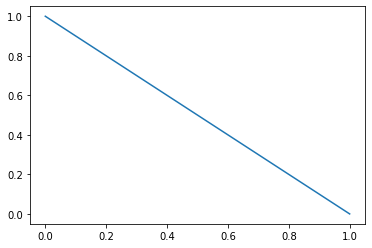

In [2]:
plt.plot([0, 1], [1, 0])

O nível seguinte na hierarquia é o primeiro que usa uma interface orientada a objetos. Nesse nível, as funções de *pyplot* são usadas para criar objetos, como figuras e os eixos delas, e o usuário explicitamente controla os objetos das figuras e dos eixos. Após criar as figuras e seus eixos, os últimos são usados para a maior parte das ações de geração dos gráficos. 

Para ainda mais controle, o que pode ser útil para usar gráficos *matplotlib* em aplicações, o nível de *pyplot* pode ser deixado de lado totalmente. Nesse caso, o desenvolvedor usaria apenas a interface orientada a objetos.

## Partes de uma figura

<figure>
  <img src="../images/anatomy.png" alt="Anatomia de uma figura do matplotlib"/>
  <figcaption>Figura 1: Anatomia de uma figura do matplotlib. Fonte: matplotlib.org</figcaption>
</figure>

### Figure

A figura inteira. O objeto *Figure* mantém registro de um ou mais objetos *Axes*, um conjunto de "artistas" (títulos, legendas, etc) e a tela (*canvas*) onde tudo é desenhado. Uma figura pode conter qualquer número de *Axes*, mas pra que ela seja útil, pelo menos um é necessário. A forma mais fácil de criar uma figura é usando *pyplot*:

In [13]:
fig = plt.figure()  # figura vazia sem Axes

<Figure size 432x288 with 0 Axes>

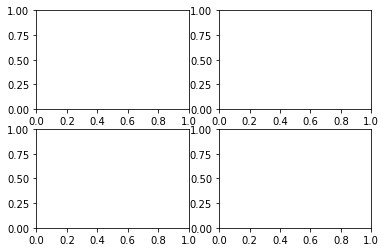

In [14]:
fig, ax_lst = plt.subplots(
    2, 2
)  # figura com grid 2x2 grid de Axes

### Axes

Esse objeto é o que pode ser de fato pensado como "um gráfico", sendo a região da imagem que contém o espaço de dados. Cada objeto *Axes* pode pertencer a apenas uma *Figure* e contém dois (ou três, em gráficos 3D) objetos do tipo *Axis* que controlam os limites dos dados. Note a diferença entre *Axis* (eixo, singular) e *Axes* (eixos, plural). Cada *Axes* tem um título (definido via set_title()), um rótulo do eixo $x$ (definido via set_xlabel()) e um rótulo do eixo $y$ (set_ylabel()). A classe *Axes* e seus métodos são o principal ponto de entrada para trabalhar com a interface orientada a objetos do *matplotlib*.

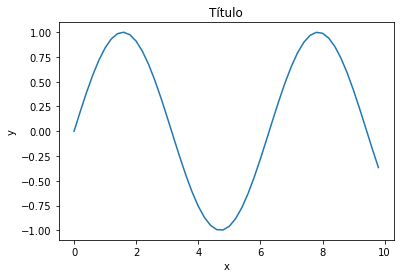

In [17]:
import numpy as np

x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Título')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### Axis

Esses são os eixos individuais do gráfico. Os objetos *Axis* controlam os limites dos eixos e as marcações nos eixos e seus rótulos.


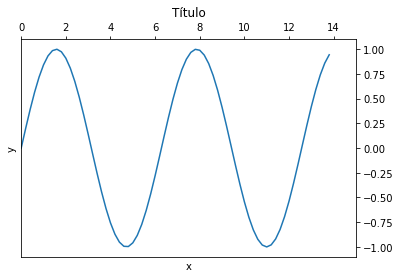

In [33]:
x = np.arange(0, 14, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Título')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0, 15])

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')

plt.show()

### Artist

Tudo que pode ser visto em uma figura é um artista, incluindo os objetos *Figure*, *Axes* e *Axis*, além de objetos do tipo *Text* (como títulos), *Line2D*, *Patch*, etc. Quando a figura é renderizada, todos os artistas são desenhados na tela.

### Pyplot Vs interface OO

Para funções no módulo *pyplot*, sempre existe uma figura e eixos "atuais" e não explícitos, criados automaticamente. No exemplo a seguir, a primeira chamada a *plt.plot* cria os eixos (*Axes*) e as chamadas seguintes adicionam novas linhas ao mesmo objeto *Axes*.

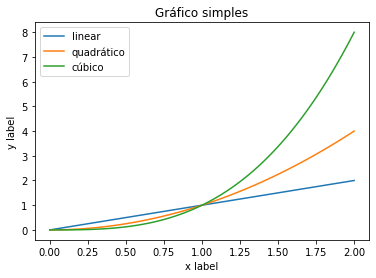

In [37]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadrático')
plt.plot(x, x**3, label='cúbico')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Gráfico simples")

plt.legend()

plt.show()

O mesmo gráfico usando a interface orientada a objetos:

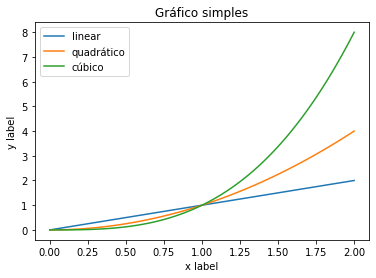

In [41]:
fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadrático')
ax.plot(x, x**3, label='cúbico')

ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.set_title("Gráfico simples")

ax.legend()

plt.show()

Os códigos são muito parecidos. Então por que ter duas formas de fazer o mesmo gráfico? Para exemplos simples como esse, a versão *pyplot* pura é suficiente. No entanto, frequentemente terminamos fazendo os mesmos gráficos repetidamente para dados diferentes, mudando apenas pequenos detalhes. Nesses casos, a interface orientada a objetos se torna mais valiosa, por ser mais completa e mais fácil de manter.

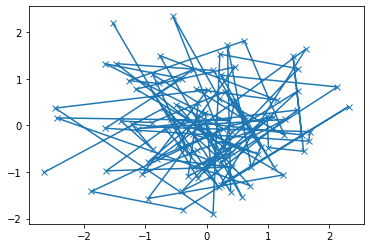

In [42]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

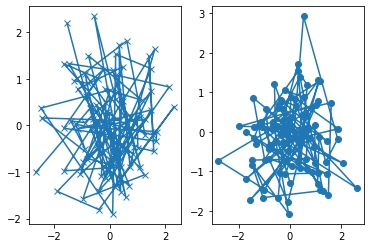

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})